In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
tabela = pd.read_csv('advertising.csv')

In [9]:
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


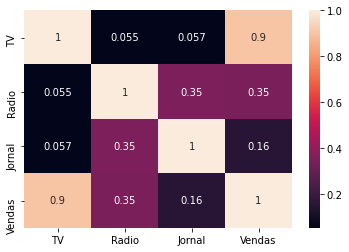

In [15]:
#vai exibir a correlação existente na tabela
#quando mais investe em tv mais vendas tem (x=tv, y=vendas)
#não há relação entre investimentos em tv e jornal pois o valor é quase 0 (x=jornal, y)
#muitos modelos de IA não podem ter uma correlação alta entre as característica (ex: radio e tv)
sns.heatmap(tabela.corr(), annot=True)
plt.show()

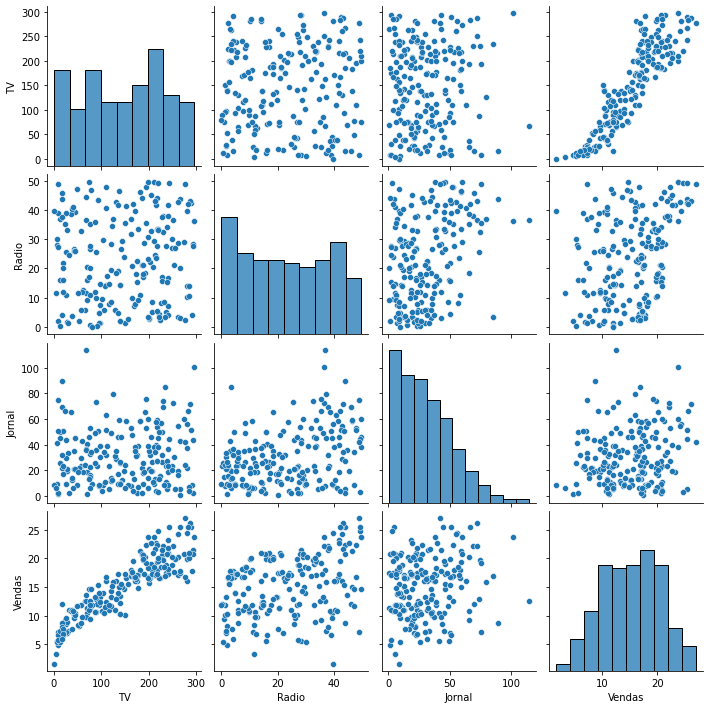

In [16]:
#mesmas informações que anteriormente mas de outra forma
#quanto mais junto as bolinhas maior a correlação
sns.pairplot(tabela)
plt.show()

In [18]:
#importação apenas do train_test_slipt da biblioteca skleanr.model
from sklearn.model_selection import train_test_split

In [20]:
#definindo quem é x e y
y = tabela["Vendas"]
x = tabela.drop("Vendas", axis=1) #todos menos o venda

In [25]:
#separação em x e y de treino ou teste sempre nessa ordem
#test_size = proporção da base de dados que será para teste (0,3 = 30%)
#random_state cria um padrão de distribuição, que será aleatório mas padronizado
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3, random_state=1)

In [32]:
#importação e criação do método de regressão linear
from sklearn.linear_model import LinearRegression 
modelo_regressaoLinear = LinearRegression()
#importação e criação do método de RandomForest (árvores de decisão)
from sklearn.ensemble import RandomForestRegressor
modelo_arvoredecisao = RandomForestRegressor()

#treinamento dos modelos de IA
modelo_regressaoLinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [35]:
#medir a porcentagem de precissão do modelo
from sklearn import metrics

#criar previsão
previsao_regressaoLinear = modelo_regressaoLinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

In [41]:
#comparacao dos modelos
print(metrics.r2_score(y_teste, previsao_regressaoLinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))

0.9071151423684273
0.9631816882314604


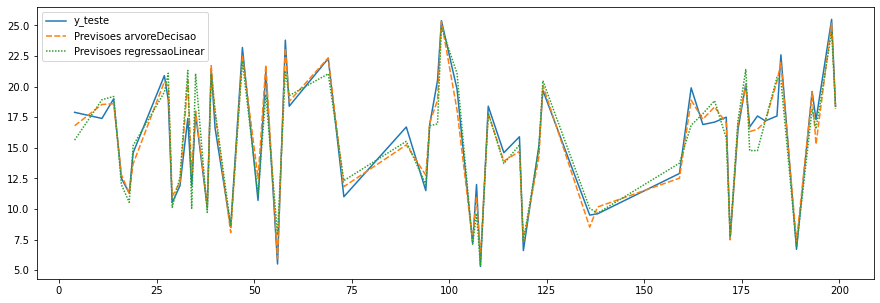

In [48]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes arvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes regressaoLinear"] = previsao_regressaoLinear

plt.figure(figsize=(15,5))
sns.lineplot(data=tabela_auxiliar)
plt.show()

<AxesSubplot:>

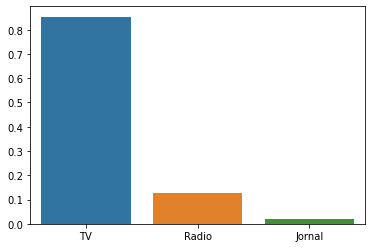

In [51]:
#importancia de cada uma das caracteristicas
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)